# Image Classification Project

In [1]:
# Importing modules 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from tensorflow.keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D
from keras.models import Sequential
from keras import backend as K

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Loading data 

In [2]:
#loading data into a file directory
from random import shuffle
from glob import glob
image_file = glob(r"C:\Users\Lenovo\Desktop\amazon images\*.jpg")
shuffle(image_file)

In [3]:
image_file[0:10]

['C:\\Users\\Lenovo\\Desktop\\amazon images\\Saree_1735.jpg',
 'C:\\Users\\Lenovo\\Desktop\\amazon images\\Saree_806.jpg',
 'C:\\Users\\Lenovo\\Desktop\\amazon images\\Saree_143.jpg',
 'C:\\Users\\Lenovo\\Desktop\\amazon images\\Jeans_278.jpg',
 'C:\\Users\\Lenovo\\Desktop\\amazon images\\Saree_1263.jpg',
 'C:\\Users\\Lenovo\\Desktop\\amazon images\\Saree_2668.jpg',
 'C:\\Users\\Lenovo\\Desktop\\amazon images\\Saree_722.jpg',
 'C:\\Users\\Lenovo\\Desktop\\amazon images\\Saree_269.jpg',
 'C:\\Users\\Lenovo\\Desktop\\amazon images\\Saree_2125.jpg',
 'C:\\Users\\Lenovo\\Desktop\\amazon images\\Saree_935.jpg']

### List of image and image label

In [4]:
images = []
img_label = []
shape = (200,200)

for filename in image_file:
    img = cv2.imread(filename)
    
    # Resize all images to a specific shape
    if img is None:
        print('Wrong file:', filename)
    else:
        img = cv2.resize(img,shape)
        images.append(img)
        # Spliting file names and storing the labels for image in list
        img_label.append(filename.split("images")[1].split('_')[0][1:])

Wrong file: C:\Users\Lenovo\Desktop\amazon images\Jeans_599.jpg


### Visualisation

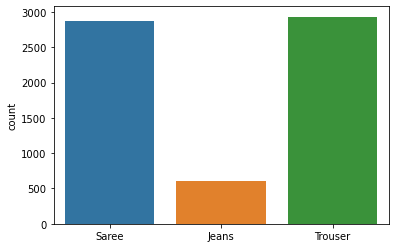

In [5]:
#lets check the labels
sns.countplot(img_label)
plt.show()

In [6]:
# Converting labels into One Hot encoded sparse matrix
img_label = pd.get_dummies(img_label).values

# Converting train_images to array
images = np.array(images)

In [7]:
#lets check the amount of data we have
len(images), len(img_label)

(6407, 6407)

### Training and Testing

In [8]:
# Splitting Training data into train and validation dataset
x_train,x_test,y_train,y_test = train_test_split(images,img_label,test_size=0.25,random_state=1)

In [9]:
#lets check the shape of training and testing set
print("Training images:", x_train.shape)
print("Training labels:", y_train.shape)
print("Testing images:", x_test.shape)
print("Testing labels:", y_test.shape)

Training images: (4805, 200, 200, 3)
Training labels: (4805, 3)
Testing images: (1602, 200, 200, 3)
Testing labels: (1602, 3)


[0 1 0]


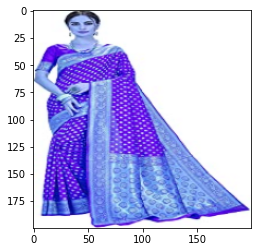

In [10]:
# Visualizing Training data
print(img_label[0])
plt.imshow(images[0])
plt.show()

In [11]:
img_label

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

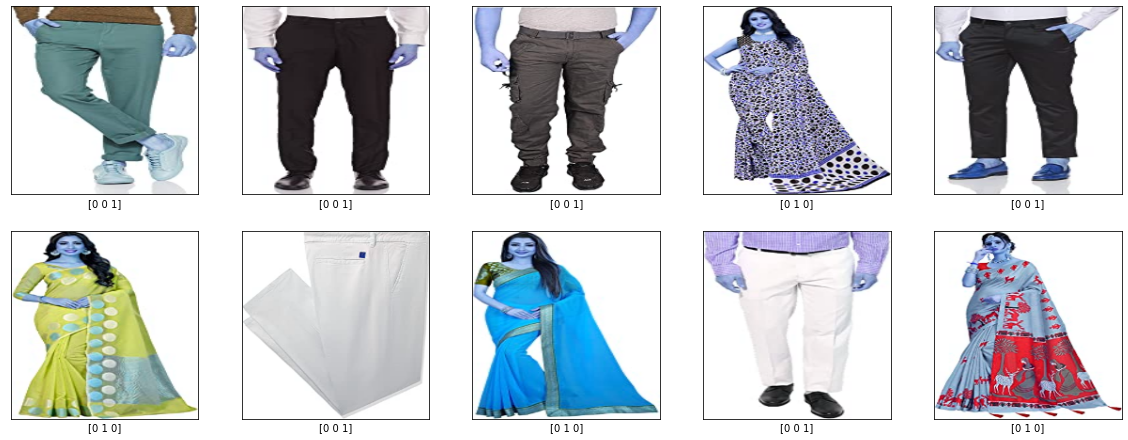

In [12]:
#Lets visualize some more images along with their labels
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

### Model Building and Evaluation

In [13]:
#defining functions to calculate recall, precision and f1_scores
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### Model 1

In [ ]:
# Creating a Sequential model
model= Sequential()
#first convolution layer
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3)))
#second convolution layer
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
#third convolution layer
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
#fourth convolution layer
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())
#adding fully connected layers
model.add(Dense(100,activation='relu'))
model.add(Dense(3,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_score, precision_m, recall_m],
              optimizer='adam'
             )

In [15]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 30)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 30)        8

In [16]:
# Training the model
history = model.fit(x_train,y_train,epochs=3,batch_size=50,verbose = 1,validation_data=(x_test,y_test))

Epoch 1/3
97/97 [==============================] - 566s 6s/step - loss: 1.2019 - accuracy: 0.8558 - f1_score: 0.8556 - precision_m: 0.8575 - recall_m: 0.8542 - val_loss: 0.1265 - val_accuracy: 0.9588 - val_f1_score: 0.9600 - val_precision_m: 0.9600 - val_recall_m: 0.9600
Epoch 2/3
97/97 [==============================] - 532s 5s/step - loss: 0.1140 - accuracy: 0.9609 - f1_score: 0.9611 - precision_m: 0.9612 - recall_m: 0.9610 - val_loss: 0.7124 - val_accuracy: 0.7122 - val_f1_score: 0.7184 - val_precision_m: 0.7205 - val_recall_m: 0.7164
Epoch 3/3
97/97 [==============================] - 539s 6s/step - loss: 0.0715 - accuracy: 0.9732 - f1_score: 0.9734 - precision_m: 0.9734 - recall_m: 0.9734 - val_loss: 0.0318 - val_accuracy: 0.9900 - val_f1_score: 0.9903 - val_precision_m: 0.9903 - val_recall_m: 0.9903


### Model 2

In [17]:
# Creating second Sequential model
model2= Sequential()
#first convolution layer
model2.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(200,200,3,)))
#second convolution layer
model2.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model2.add(MaxPool2D(2,2))
#third convolution layer
model2.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model2.add(MaxPool2D(2,2))
#fourth convolution layer
model2.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))

model2.add(Flatten())
#adding fully connected layers
model2.add(Dense(100,activation='relu'))
model2.add(Dense(3,activation = 'softmax'))
    
model2.compile(
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_score, precision_m, recall_m],
              optimizer='adam'
             )

In [18]:
# Model Summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 98, 98, 30)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 30)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 30)       

In [19]:
# Training the model
history2 = model2.fit(x_train,y_train,epochs=3,batch_size=50,verbose = 1,validation_data=(x_test,y_test))

Epoch 1/3
97/97 [==============================] - 516s 5s/step - loss: 22.5378 - accuracy: 0.8762 - f1_score: 0.8763 - precision_m: 0.8800 - recall_m: 0.8728 - val_loss: 0.0694 - val_accuracy: 0.9788 - val_f1_score: 0.9794 - val_precision_m: 0.9794 - val_recall_m: 0.9794
Epoch 2/3
97/97 [==============================] - 509s 5s/step - loss: 0.0265 - accuracy: 0.9927 - f1_score: 0.9928 - precision_m: 0.9928 - recall_m: 0.9928 - val_loss: 0.0047 - val_accuracy: 0.9994 - val_f1_score: 0.9994 - val_precision_m: 0.9994 - val_recall_m: 0.9994
Epoch 3/3
97/97 [==============================] - 511s 5s/step - loss: 0.0157 - accuracy: 0.9956 - f1_score: 0.9957 - precision_m: 0.9957 - recall_m: 0.9957 - val_loss: 0.0182 - val_accuracy: 0.9925 - val_f1_score: 0.9927 - val_precision_m: 0.9927 - val_recall_m: 0.9927


### Model 3

In [20]:
# Creating a Sequential model
model3= Sequential()
#first convolution layer
model3.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh',kernel_initializer='he_uniform', 
                  input_shape=(200,200,3)))
#second convolution layer
model3.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model3.add(MaxPool2D(2,2))
#third convolution layer
model3.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model3.add(MaxPool2D(2,2))
#fourth convolution layer
model3.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model3.add(Flatten())

#adding fully connected layers
model3.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(3,activation = 'softmax'))
    
model3.compile(
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_score, precision_m, recall_m],
              optimizer='adam'
             )

In [21]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 98, 30)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 30)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 46, 46, 30)       

In [22]:
# Training the model
history3 = model3.fit(x_train,y_train,epochs=3,batch_size=50,verbose = 1,validation_data=(x_test,y_test))

Epoch 1/3
97/97 [==============================] - 537s 6s/step - loss: 1.8369 - accuracy: 0.8393 - f1_score: 0.8394 - precision_m: 0.8649 - recall_m: 0.8165 - val_loss: 0.1816 - val_accuracy: 0.9251 - val_f1_score: 0.8940 - val_precision_m: 0.9067 - val_recall_m: 0.8818
Epoch 2/3
97/97 [==============================] - 532s 5s/step - loss: 0.0991 - accuracy: 0.9652 - f1_score: 0.9661 - precision_m: 0.9706 - recall_m: 0.9616 - val_loss: 0.0631 - val_accuracy: 0.9819 - val_f1_score: 0.9854 - val_precision_m: 0.9884 - val_recall_m: 0.9824
Epoch 3/3
97/97 [==============================] - 529s 5s/step - loss: 0.0371 - accuracy: 0.9888 - f1_score: 0.9893 - precision_m: 0.9909 - recall_m: 0.9878 - val_loss: 0.0396 - val_accuracy: 0.9856 - val_f1_score: 0.9878 - val_precision_m: 0.9896 - val_recall_m: 0.9861


### Model 4

In [23]:
# Creating a Sequential model
model4= Sequential()
#first convolution layer
model4.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu',kernel_initializer='he_uniform', input_shape=(200,200,3)))
#second convolution layer
model4.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model4.add(MaxPool2D(2,2))
#third convolution layer
model4.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model4.add(MaxPool2D(2,2))
#fourth convolution layer
model4.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))

model4.add(Flatten())

#adding fully connected layers
model4.add(Dense(100,activation='relu', kernel_initializer='he_uniform'))
model4.add(Dense(3,activation = 'softmax'))

model4.compile(
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_score, precision_m, recall_m],
              optimizer='adam'
             )

In [24]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 98, 98, 30)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 30)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 46, 46, 30)       

In [25]:
# Training the model
history4 = model4.fit(x_train,y_train,epochs=3,batch_size=50,verbose = 1,validation_data=(x_test,y_test))

Epoch 1/3
97/97 [==============================] - 512s 5s/step - loss: 166.4386 - accuracy: 0.8633 - f1_score: 0.8438 - precision_m: 0.8819 - recall_m: 0.8120 - val_loss: 0.1157 - val_accuracy: 0.9682 - val_f1_score: 0.9670 - val_precision_m: 0.9788 - val_recall_m: 0.9558
Epoch 2/3
97/97 [==============================] - 508s 5s/step - loss: 0.0660 - accuracy: 0.9871 - f1_score: 0.9828 - precision_m: 0.9904 - recall_m: 0.9755 - val_loss: 0.0411 - val_accuracy: 0.9906 - val_f1_score: 0.9880 - val_precision_m: 0.9944 - val_recall_m: 0.9818
Epoch 3/3
97/97 [==============================] - 505s 5s/step - loss: 0.0178 - accuracy: 0.9967 - f1_score: 0.9962 - precision_m: 0.9973 - recall_m: 0.9951 - val_loss: 0.0084 - val_accuracy: 0.9994 - val_f1_score: 0.9976 - val_precision_m: 0.9994 - val_recall_m: 0.9958


### Model 5

In [26]:
# Creating a Sequential model
model5= Sequential()
#first convolution layer
model5.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh',kernel_initializer='uniform', input_shape=(200,200,3)))
#second convolution layer
model5.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model5.add(MaxPool2D(2,2))
#third convolution layer
model5.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model5.add(MaxPool2D(2,2))
#fourth convolution layer
model5.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model5.add(Flatten())

#adding fully connected layers
model5.add(Dense(100,activation='relu',kernel_initializer='uniform'))
model5.add(Dense(3,activation = 'softmax'))
    
model5.compile(
              loss='categorical_crossentropy', 
              metrics=['accuracy', f1_score, precision_m, recall_m],
              optimizer='adam'
             )

In [27]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 conv2d_17 (Conv2D)          (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 98, 98, 30)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 30)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 46, 46, 30)       

In [28]:
# Training the model
history5 = model5.fit(x_train,y_train,epochs=3,batch_size=50,verbose = 1,validation_data=(x_test,y_test))

Epoch 1/3
97/97 [==============================] - 551s 6s/step - loss: 2.0618 - accuracy: 0.7732 - f1_score: 0.7667 - precision_m: 0.7916 - recall_m: 0.7499 - val_loss: 0.2321 - val_accuracy: 0.9039 - val_f1_score: 0.9057 - val_precision_m: 0.9066 - val_recall_m: 0.9048
Epoch 2/3
97/97 [==============================] - 534s 6s/step - loss: 0.1575 - accuracy: 0.9378 - f1_score: 0.9385 - precision_m: 0.9393 - recall_m: 0.9377 - val_loss: 0.1339 - val_accuracy: 0.9551 - val_f1_score: 0.9554 - val_precision_m: 0.9563 - val_recall_m: 0.9545
Epoch 3/3
97/97 [==============================] - 535s 6s/step - loss: 0.0746 - accuracy: 0.9725 - f1_score: 0.9727 - precision_m: 0.9730 - recall_m: 0.9724 - val_loss: 0.0534 - val_accuracy: 0.9782 - val_f1_score: 0.9788 - val_precision_m: 0.9788 - val_recall_m: 0.9788


### Selecting final model

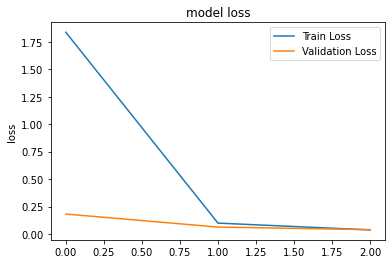

In [29]:
# summarize history for loss
plt.plot(model3.history.history['loss'],label="Train Loss")
plt.plot(model3.history.history['val_loss'],label="Validation Loss")
plt.title('model loss')
plt.ylabel('loss')
plt.legend()
plt.show()

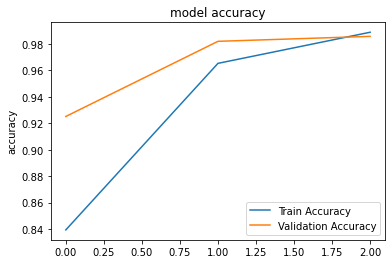

In [30]:
# summarize history for accuracy
plt.plot(model3.history.history['accuracy'],label="Train Accuracy")
plt.plot(model3.history.history['val_accuracy'],label="Validation Accuracy")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.show()

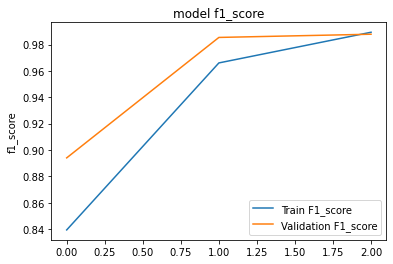

In [31]:
# summarize history for F1_score
plt.plot(model3.history.history['f1_score'],label="Train F1_score")
plt.plot(model3.history.history['val_f1_score'],label="Validation F1_score")
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.legend()
plt.show()

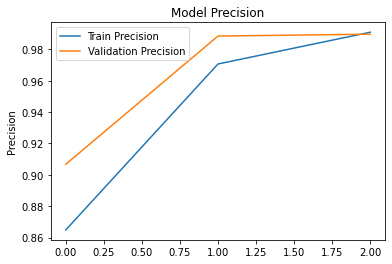

In [32]:
# summarize history for F1_score
plt.plot(model3.history.history['precision_m'],label="Train Precision")
plt.plot(model3.history.history['val_precision_m'],label="Validation Precision")
plt.title('Model Precision')
plt.ylabel('Precision')
plt.legend()
plt.show()

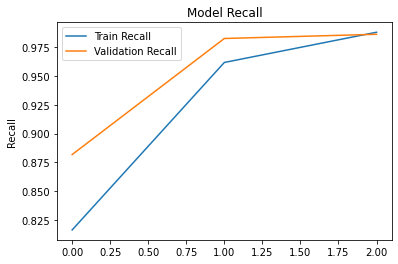

In [33]:
# summarize history for F1_score
plt.plot(model3.history.history['recall_m'],label="Train Recall")
plt.plot(model3.history.history['val_recall_m'],label="Validation Recall")
plt.title('Model Recall')
plt.ylabel('Recall')
plt.legend()
plt.show()


In [34]:
# Evaluating model on validation data
evaluate = model3.evaluate(x_test,y_test)
print(evaluate)

51/51 [==============================] - 39s 764ms/step - loss: 0.0396 - accuracy: 0.9856 - f1_score: 0.9877 - precision_m: 0.9895 - recall_m: 0.9859
[0.03962954133749008, 0.9856429696083069, 0.9876964688301086, 0.9895438551902771, 0.9859068393707275]


### Testing and Prediction

In [35]:
# Testing predictions and the actual label
checkImage = x_test[0:1]
checklabel = y_test[0:1]

predict = model.predict(np.array(checkImage))

output = { 0:'Jeans',1:'Saree',2:'Trouser'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  [[0 1 0]]
Predicted :-  Saree


In [36]:
# Testing predictions and the actual label
checkImage = x_test[50:51]
checklabel = y_test[50:51]

predict = model.predict(np.array(checkImage))

output = { 0:'Jeans',1:'Saree',2:'Trouser'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  [[0 0 1]]
Predicted :-  Trouser


### saving the model

In [37]:
#saving the model
model3.save("classified_image.h5")